In [1]:
# Import libraries
import keras
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
#K.set_image_dim_ordering('th')
K.image_data_format()
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Conv2D
from keras.optimizers import SGD,RMSprop,Adam
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 64
epochs = 40
num_classes = 2


In [2]:
#%%

PATH = os.getcwd()
print(PATH)
# Define data path
data_path = PATH + '/content/drive/MyDrive/Lung CT/dataset'
print(data_path)
data_dir_list = os.listdir('/content/drive/MyDrive/Lung CT/dataset')
print(data_dir_list)

img_rows=128
img_cols=128
num_channel=1
num_epoch=40

/content
/content/content/drive/MyDrive/Lung CT/dataset
['Normal', 'Covid']


In [3]:
for dataset in data_dir_list:
    try:
        img_list=os.listdir('/content/drive/MyDrive/Lung CT/dataset'+'/'+dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    except NotADirectoryError:
        pass

Loaded the images of dataset-Normal

Loaded the images of dataset-Covid



In [5]:
# Define the number of classes
num_classes = 2

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir('/content/drive/MyDrive/Lung CT/dataset'+'//'+ dataset)
	#print(img_list)
	print("......................")
	print(len(img_list))
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread('/content/drive/MyDrive/Lung CT/dataset' + '//'+ dataset + '//'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
# print (img_data.shape)

# print(img_data)
# print(img_data.shape)
USE_SKLEARN_PREPROCESSING=False
if USE_SKLEARN_PREPROCESSING:
	img_data=img_data
#%%

......................
2424
Loaded the images of dataset-Normal

......................
5347
Loaded the images of dataset-Covid



In [6]:
# Define the number of classes
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:2424]=0
labels[2424:]=1

Y=labels
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5439, 128, 128)
(5439,)
(2332, 128, 128)
(2332,)


In [9]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np


#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 128, 128, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 128, 128, 1))  # adapt this if using `channels_first` image data format
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
np.save("xtrain",'x_train')
print(x_train.shape)
#print(train_Y_one_hot.shape)
print(x_test.shape)
#print(test_Y_one_hot.shape)
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)
print(x_train.shape)
print(x_test.shape)
print("Shapes")

# # def train_model():
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(128,128,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.3))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(Dropout(0.3))
fashion_model.add(LeakyReLU(alpha=0.1)) 
#own added layers
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3)) 
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3))
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3))
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3))
# own added layers end
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same',name='encoder'))
#fashion_model.add(Dropout(0.5))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_model.summary()

fashion_train = fashion_model.fit(x_train, train_Y_one_hot, batch_size=128,epochs=40,verbose=1,validation_data=(x_test, test_Y_one_hot))
fashion_model.save('auto.h5')
#     input_img = Input(shape=(128, 128, 1))  # adapt this if using `channels_first` image data format
#     x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
#     x = MaxPooling2D((2, 2), padding='same')(x)
#     x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2), padding='same')(x)
#     x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#     encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

#     # at this point the representation is (4, 4, 8) i.e. 128-dimensional

#     x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
#     x = UpSampling2D((2, 2))(x)
#     x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#     x = UpSampling2D((2, 2))(x)
#     x = Conv2D(16, (3, 3), activation='relu')(x)
#     x = UpSampling2D((2, 2))(x)
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#     autoencoder = Model(input_img, decoded)
#     autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#     autoencoder.fit(x_train_noisy, train_Y_one_hot,
#                     epochs=1,
#                     batch_size=128,
#                     shuffle=True,
#                     validation_data=(x_test_noisy, test_Y_one_hot))


#train_model()



(5439, 128, 128, 1)
(2332, 128, 128, 1)
(5439, 128, 128, 1)
(2332, 128, 128, 1)
(5439, 128, 128, 1)
(2332, 128, 128, 1)
Shapes
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 64, 64, 64)        0   

In [10]:
test_eval = fashion_model.evaluate(x_test,test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

73/73 [==============================] - 2s 28ms/step - loss: 0.0981 - accuracy: 0.9760
Test loss: 0.09807883203029633
Test accuracy: 0.9759863018989563


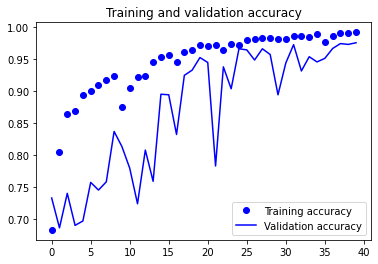

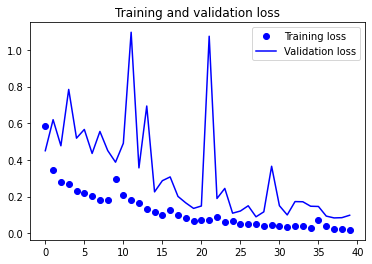

In [11]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:

fashion_model_d = Sequential()
fashion_model_d.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(128,128,1),padding='same'))
fashion_model_d.add(LeakyReLU(alpha=0.1))
fashion_model_d.add(MaxPooling2D((2, 2),padding='same'))
fashion_model_d.add(Dropout(0.5))
fashion_model_d.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model_d.add(LeakyReLU(alpha=0.1))
fashion_model_d.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model_d.add(Dropout(0.5))
fashion_model_d.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model_d.add(LeakyReLU(alpha=0.1))                  
fashion_model_d.add(MaxPooling2D(pool_size=(2, 2),padding='same',name='encoder'))
fashion_model_d.add(Dropout(0.5))
fashion_model_d.add(Flatten())
fashion_model_d.add(Dense(128, activation='linear'))
fashion_model_d.add(LeakyReLU(alpha=0.1)) 
fashion_model_d.add(Dropout(0.5))
fashion_model_d.add(Dense(num_classes, activation='softmax'))


fashion_model_d.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_model_d.summary()

fashion_train_d = fashion_model_d.fit(x_train, train_Y_one_hot, batch_size=batch_size,epochs=40,verbose=1,validation_data=(x_test, test_Y_one_hot))
fashion_model_d.save('auto_drop.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)       

In [17]:
test_eval = fashion_model_d.evaluate(x_test,test_Y_one_hot, verbose=1)


print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

73/73 [==============================] - 1s 18ms/step - loss: 0.0969 - accuracy: 0.9696
Test loss: 0.09693191200494766
Test accuracy: 0.9695540070533752


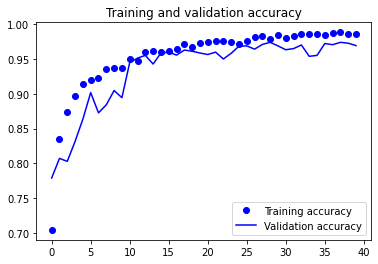

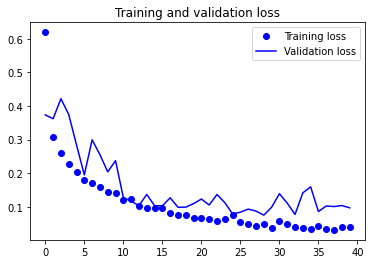

In [18]:
accuracy = fashion_train_d.history['accuracy']
val_accuracy = fashion_train_d.history['val_accuracy']
loss = fashion_train_d.history['loss']
val_loss = fashion_train_d.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Found 2261 correct labels


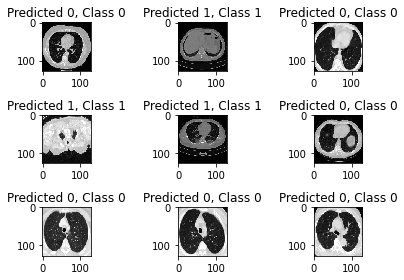

In [19]:
#PREDICT LABEL:S

predicted_classes = fashion_model_d.predict(x_test)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

correct = np.where(predicted_classes==y_test)[0]
#print(correct)
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(128,128), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 71 incorrect labels


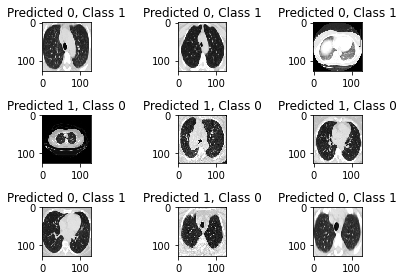

In [20]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
#print(type(y_test))
#print(len(y_test))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    #print( y_test[incorrect])
    plt.imshow(x_test[incorrect].reshape(128,128), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(test_Y_one_hot,axis=1), predicted_classes))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names,
                      #title='Confusion matrix')
#plt.figure() 
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()


<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[ 702   32]
 [  39 1559]]


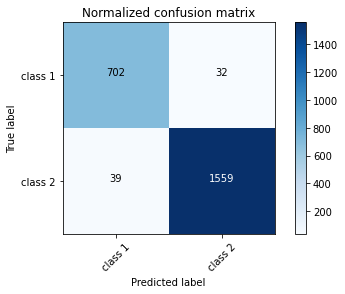

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(y_test, predicted_classes))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names,
                      #title='Confusion matrix')
#plt.figure()
#Plot normalized confusion matrix
target_names = ['class 1', 'class 2']
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                     title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [23]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))
print(confusion_matrix(y_test, predicted_classes))

              precision    recall  f1-score   support

     Class 0       0.95      0.96      0.95       734
     Class 1       0.98      0.98      0.98      1598

    accuracy                           0.97      2332
   macro avg       0.96      0.97      0.96      2332
weighted avg       0.97      0.97      0.97      2332

[[ 702   32]
 [  39 1559]]
